In [49]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [52]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Here there is no null value in data set

In [53]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [54]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [55]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [56]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [57]:
x = df.iloc[:,[1,3,4,5,6,7,8]]
y = df.iloc[:,2]

In [58]:
x  #feature 2 Dimension

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Dealer,Manual,0
297,2015,5.90,60000,Petrol,Dealer,Manual,0
298,2009,11.00,87934,Petrol,Dealer,Manual,0
299,2017,12.50,9000,Diesel,Dealer,Manual,0


In [59]:
y # Target 1 Dimenstion

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [60]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Dealer,Manual,0
297,2015,5.90,60000,Petrol,Dealer,Manual,0
298,2009,11.00,87934,Petrol,Dealer,Manual,0
299,2017,12.50,9000,Diesel,Dealer,Manual,0


In [61]:
x.describe()

,Year,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,7.628472,36947.205980,0.043189
std,2.891554,8.644115,38886.883882,0.247915
min,2003.000000,0.320000,500.000000,0.000000
25%,2012.000000,1.200000,15000.000000,0.000000
50%,2014.000000,6.400000,32000.000000,0.000000
75%,2016.000000,9.900000,48767.000000,0.000000
max,2018.000000,92.600000,500000.000000,3.000000


Here from above figures it is clear that Present_Price,Kms_Driven has positive skewness

In [62]:
catcol=x.select_dtypes(object).columns
catcol

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [63]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[catcol]=oe.fit_transform(x[catcol])


In [64]:
x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2.0,0.0,1.0,0
1,2013,9.54,43000,1.0,0.0,1.0,0
2,2017,9.85,6900,2.0,0.0,1.0,0
3,2011,4.15,5200,2.0,0.0,1.0,0
4,2014,6.87,42450,1.0,0.0,1.0,0


# Splitting the Data into Train and Test

In [65]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=2)

# Creation of Machine Learning Model

In [66]:

#step1 Import the Model
from sklearn.linear_model import LinearRegression

#step2 Initiate the model
linreg=LinearRegression()

#step3 train the model
linreg.fit(xtrain,ytrain)

#step4 make prediction
ypred = linreg.predict(xtest)
train_data_prediction = linreg.predict(xtrain)
test_data_prediction = linreg.predict(xtest)

# Model Evaluation

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)

print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy : {r2}")

MAE : 1.1946770038687478
MSE : 2.6087042112159744
RMSE : 1.6151483557914965
Accuracy : 0.8191909743727105


# Visualization of Actual Price and Predicted selling Price

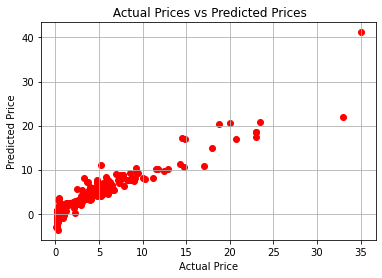

In [68]:
plt.scatter(ytrain,linreg.predict(xtrain),color="red")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.grid()
plt.show()

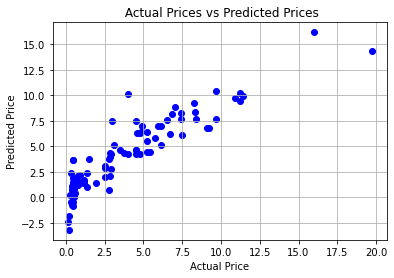

In [69]:
plt.scatter(ytest,linreg.predict(xtest),color="blue")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.grid()
plt.show()

In [70]:
x.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')

In [71]:
def priceprediction(year,pp,kd,ft,st,trans,owner):
    newob = [[year,pp,kd,ft,st,trans,owner]]
    yp = linreg.predict(newob)[0]
    print(f"The price of your Car is $ {yp: .2f}")
    return yp

In [72]:
priceprediction(2019,5.59,27000,2,0,1,0)

The price of your Car is $  5.88


5.883046579146253

In [73]:
priceprediction(2014,5.59,27000,2,0,1,0)

The price of your Car is $  3.85


3.846680957210083

# Ridge and Lasso Regularization

# 1)Check Ridge L2 Error

In [74]:
from sklearn.linear_model import Ridge,Lasso
l2=Ridge(alpha=10)
l2.fit(xtrain,ytrain)
ypred=l2.predict(xtest)

train=l2.score(xtrain,ytrain)
test=l2.score(xtest,ytest)

print(f"Training Results: {train}")
print(f"Testing Results: {test}")

Training Results: 0.8835500247545313
Testing Results: 0.8401744559943167


# Hyper parameter Tunning for Ridge

In [75]:
for i in range(1,300):
    l2=Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    
    train=l2.score(xtrain,ytrain)
    test=l2.score(xtest,ytest)
    
    print(f"{i}  {train}  {test}")

1  0.8862970084748801  0.8225649005728876
2  0.8861566477516889  0.8255355446814184
3  0.8859483071996481  0.8281629464686459
4  0.8856875497428529  0.8304961445624488
5  0.8853865117618571  0.8325755871167843
6  0.8850547335280444  0.8344349277250904
7  0.884699764933675  0.836102384803486
8  0.8843276139588236  0.8376017850684709
9  0.883943083105112  0.8389533745513416
10  0.8835500247545313  0.8401744559943167
11  0.8831515370300347  0.8412798948449489
12  0.8827501154408905  0.8422825246052322
13  0.8823477712961583  0.8431934742543119
14  0.8819461248838139  0.8440224347384753
15  0.8815464793085276  0.8447778773853261
16  0.8811498793778454  0.8454672340711407
17  0.880757158839295  0.84609704672805
18  0.8803689784757791  0.8466730920985751
19  0.8799858569791005  0.8472004863754041
20  0.879608196082936  0.8476837733950341
21  0.879236301106732  0.8481269993081452
22  0.8788703978114113  0.8485337760700379
23  0.8785106462763442  0.8489073356424716
24  0.8781571523594736  0.84

212  0.8568424403025802  0.8500567047651444
213  0.8568027131354148  0.8500404593558045
214  0.8567631932173062  0.8500242499671575
215  0.8567238779795039  0.8500080759675176
216  0.8566847648932714  0.8499919367305173
217  0.8566458514691346  0.8499758316352172
218  0.8566071352561458  0.849959760066062
219  0.8565686138411575  0.8499437214129631
220  0.8565302848481169  0.8499277150713211
221  0.8564921459373696  0.8499117404419855
222  0.8564541948049993  0.8498957969313565
223  0.856416429182141  0.849879883951327
224  0.8563788468343679  0.8498640009193482
225  0.8563414455610228  0.849848147258383
226  0.8563042231946347  0.8498323223969525
227  0.8562671776002817  0.8498165257690984
228  0.8562303066750263  0.8498007568144478
229  0.8561936083473128  0.8497850149780982
230  0.8561570805764136  0.8497692997107076
231  0.8561207213518788  0.849753610468461
232  0.8560845286929756  0.849737946713026
233  0.856048500648168  0.8497223079115694
234  0.8560126352945987  0.849706693536

# At Alpha=213 we get good Accuracy Value

In [76]:
from sklearn.linear_model import Ridge,Lasso
l2=Ridge(alpha=213)
l2.fit(xtrain,ytrain)
ypred=l2.predict(xtest)

train=l2.score(xtrain,ytrain)
test=l2.score(xtest,ytest)

print(f"Training Results: {train}")
print(f"Testing Results: {test}")

Training Results: 0.8568027131354148
Testing Results: 0.8500404593558045


# 2)Lasso Regularization L1-Error

In [77]:
from sklearn.linear_model import Ridge,Lasso
l1=Lasso(alpha=10)
l1.fit(xtrain,ytrain)
ypred=l1.predict(xtest)

train=l1.score(xtrain,ytrain)
test=l1.score(xtest,ytest)

print(f"Training Results: {train}")
print(f"Testing Results: {test}")

Training Results: 0.7547929832055102
Testing Results: 0.7171820166292708


# Hyper parameter Tunning for Lasso

In [78]:
for i in range(1,400,10):
    l1=Lasso(alpha=i)
    l1.fit(xtrain,ytrain)
    
    train=l1.score(xtrain,ytrain)
    test=l1.score(xtest,ytest)
    
    print(f"{i}  {train}  {test}")

1  0.8438059049440154  0.842789961740593
11  0.7469040866715586  0.7057387078865094
21  0.6266923698488256  0.5568108791067891
31  0.4313483776020606  0.34516533877778677
41  0.16087210993126388  0.07080208689950285
51  2.7533093543197218e-05  -0.0873842885226439
61  2.7511986852579717e-05  -0.08736596821641651
71  2.748711110944768e-05  -0.08734765216741569
81  2.745846631468929e-05  -0.08732934037564122
91  2.7426052468082496e-05  -0.08731103284109398
101  2.7389869569183212e-05  -0.08729272956377265
111  2.734991761865757e-05  -0.08727443054367767
121  2.7306196615950462e-05  -0.08725613578080949
131  2.7258706561616997e-05  -0.08723784527516787
141  2.7207447455102063e-05  -0.08721955902675282
151  2.7152419296627706e-05  -0.08720127703556413
161  2.7093622086304947e-05  -0.08718299930160178
171  2.7031055824022765e-05  -0.08716472582486645
181  2.696472050978116e-05  -0.08714645660535725
191  2.689461614358013e-05  -0.08712819164307439
201  2.6820742725308655e-05  -0.0871099309380

# At Alpha=1 Lasso Regularization Give Good Result

In [79]:
from sklearn.linear_model import Ridge,Lasso
l1=Lasso(alpha=1)
l1.fit(xtrain,ytrain)
ypred=l1.predict(xtest)

train=l1.score(xtrain,ytrain)
test=l1.score(xtest,ytest)

print(f"Training Results: {train}")
print(f"Testing Results: {test}")

Training Results: 0.8438059049440154
Testing Results: 0.842789961740593


# It is concluded that Ridge Regularization give best fit model

# Model Evaluation

In [80]:
#prediction on Training data
ypred_Ridge_train=l2.predict(xtrain)

In [81]:
r2 = r2_score(ytrain, ypred_Ridge_train)
print(f"Accuracy : {r2}")

Accuracy : 0.8568027131354148


In [82]:
#prediction on Training data
ypred_Ridge_test=l2.predict(xtest)

In [83]:
r2 = r2_score(ytest, ypred_Ridge_test)
print(f"Accuracy : {r2}")

Accuracy : 0.8500404593558045


# Visualization of Actual Price and Predicted selling Price

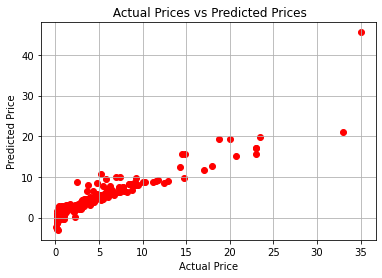

In [84]:
plt.scatter(ytrain,l2.predict(xtrain),color="red")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.grid()
plt.show()

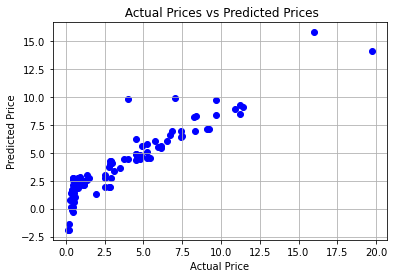

In [85]:
plt.scatter(ytest,l2.predict(xtest),color="blue")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.grid()
plt.show()

# Here the Above two graph shows, the Relationship between Actual price and Predicted price of Training And Testing are Homoskedestic
(i.e there is constant variance between the variables )

# Priceprediction

In [86]:
def priceprediction(year,pp,kd,ft,st,trans,owner):
    newob = [[year,pp,kd,ft,st,trans,owner]]
    yp = l2.predict(newob)[0]
    print(f"The price of your Car is $ {yp: .2f}")
    return yp

In [87]:
priceprediction(2014,5.59,27000,2,0,1,0)

The price of your Car is $  3.90


3.9023011026014274

In [88]:
priceprediction(2019,5.59,27000,2,0,1,0)

The price of your Car is $  6.08


6.07932505030351